# Bash part - KDE

In [2]:
stem_name="ytso_0p2"

> Here we need to copy the `${stem_name}.rmc6f` file to `${stem_name}_all.rmc6f` and manually replace all the `Sn` atoms with `Ti`.

In [3]:
thermal_ellipsoid <<< ${stem_name}_all

  Enter the name of configuration file (skip the extention)
 Reading configuration file ytso_0p2_all.rmc6f
Info> ntypes,ni: 3
       16000       16000       56000
           1       16000
       16001       32000
       32001       88000
 Thermal ellipsoid successfully generated.


In [4]:
cp Cart_coord_${stem_name}_all.txt Ti_Sn_tmp.txt
sed -i -e '1,6d' Ti_Sn_tmp.txt
sed -i -e '1,16000d' Ti_Sn_tmp.txt
sed -i -e '16001,$d' Ti_Sn_tmp.txt
awk '{ print $2, $3, $4 }' Ti_Sn_tmp.txt > Ti_Sn.txt
rm -rf Ti_Sn_tmp.txt

# Python part - global variable definition

In [5]:
stem_name = "ytso_0p2"

# Python part - KDE

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

## Ti & Sn atoms

In [7]:
columns = ['X', 'Y', 'Z']
df = pd.read_csv("Ti_Sn.txt", header=None, names=columns, delimiter=r"\s+")

### Ti & Sn - XY

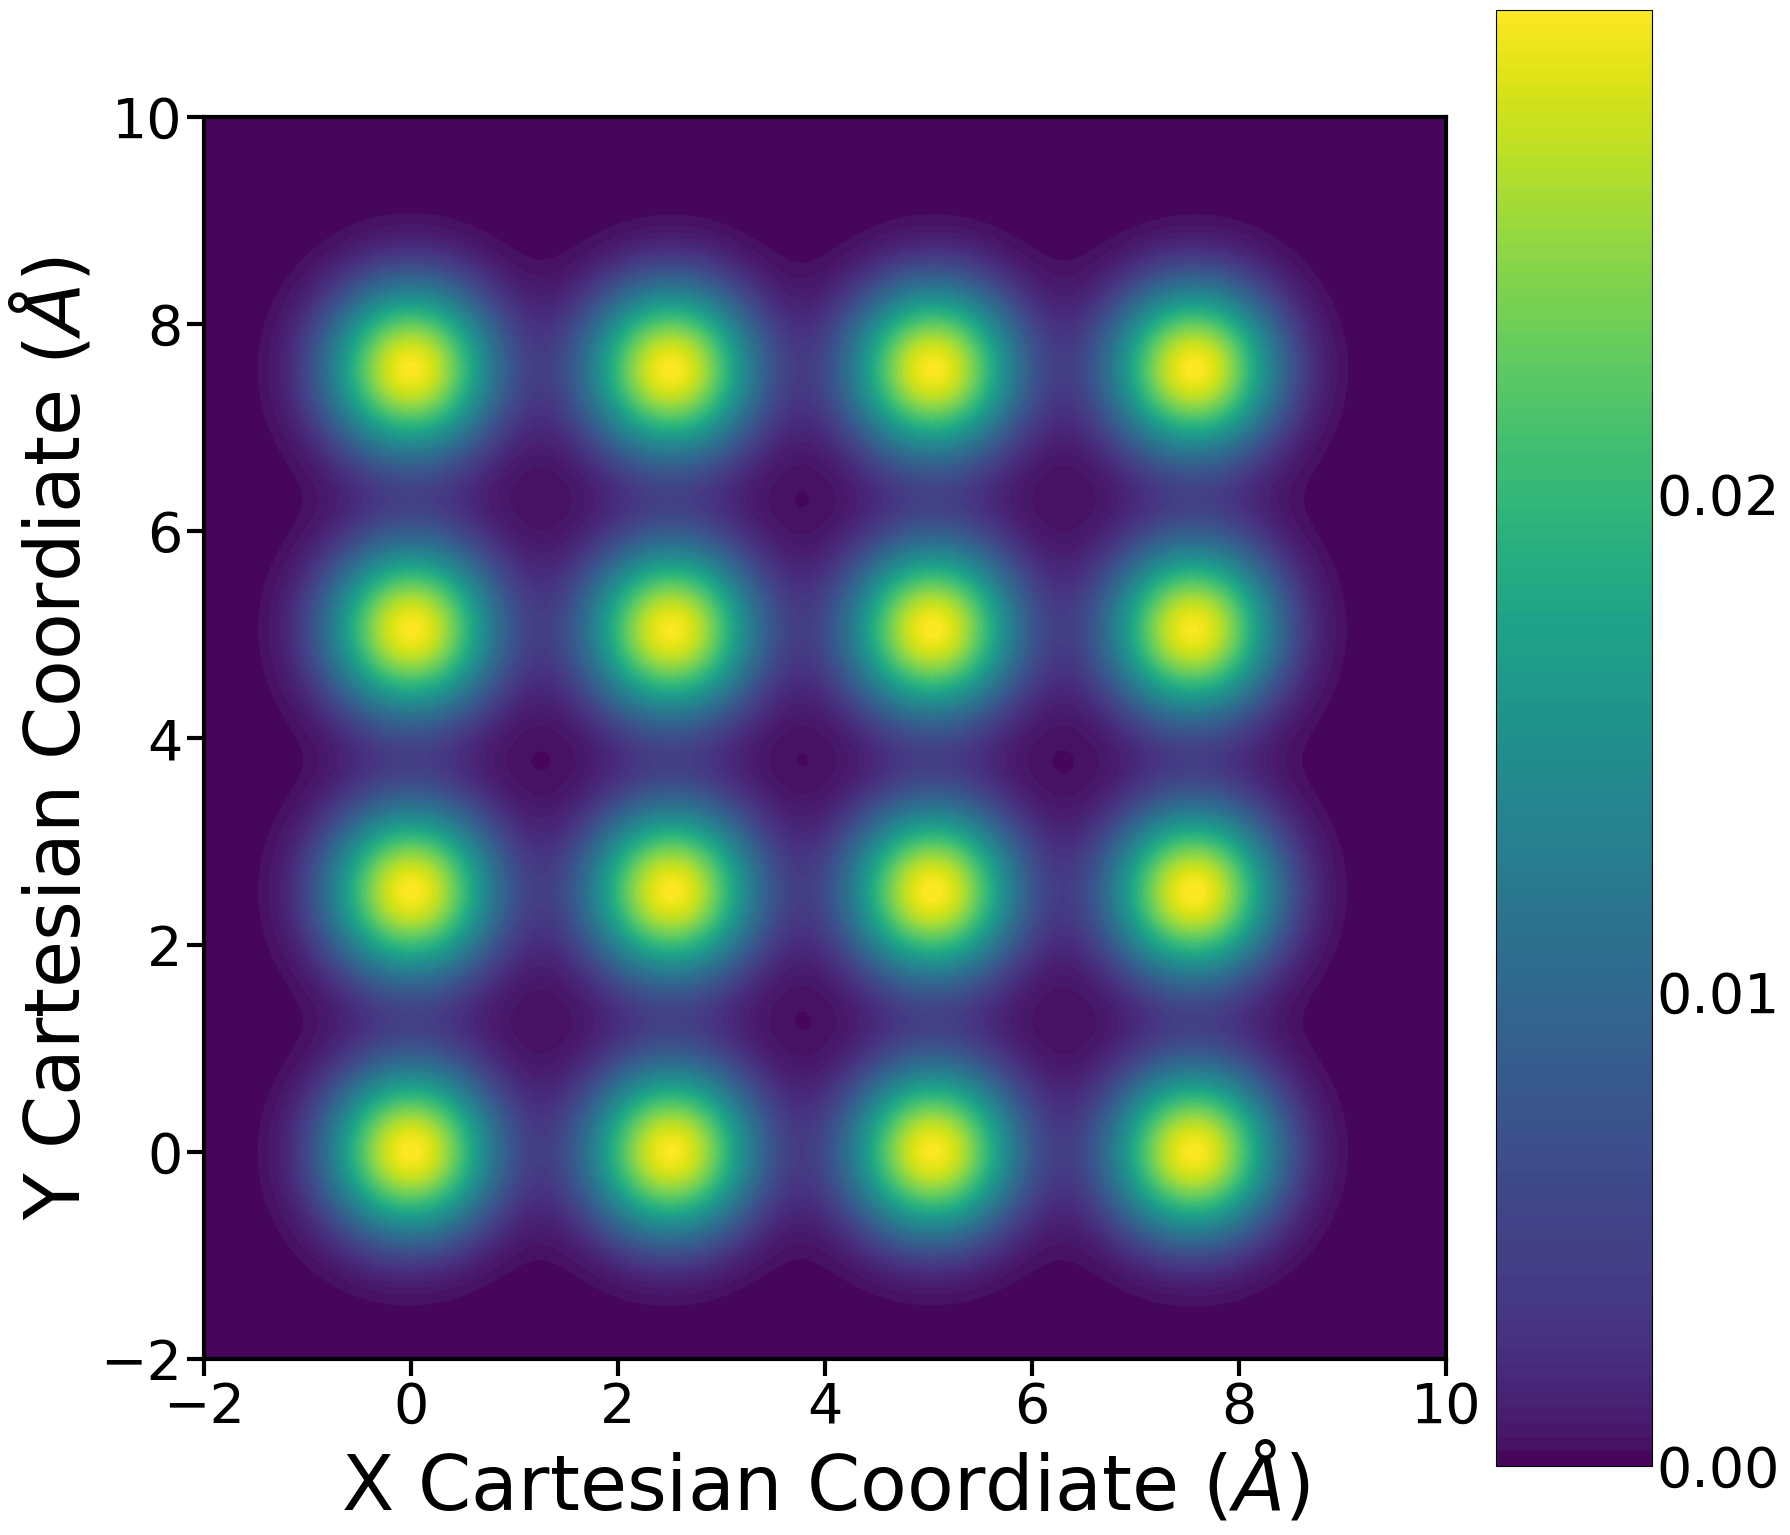

In [8]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiXY = sns.kdeplot(
    x=df['X'],
    y=df['Y'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiXY.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiXY.set_ylabel(ylabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('Ti_Sn_XY.png', format='png', dpi=600)

### Ti & Sn - XZ

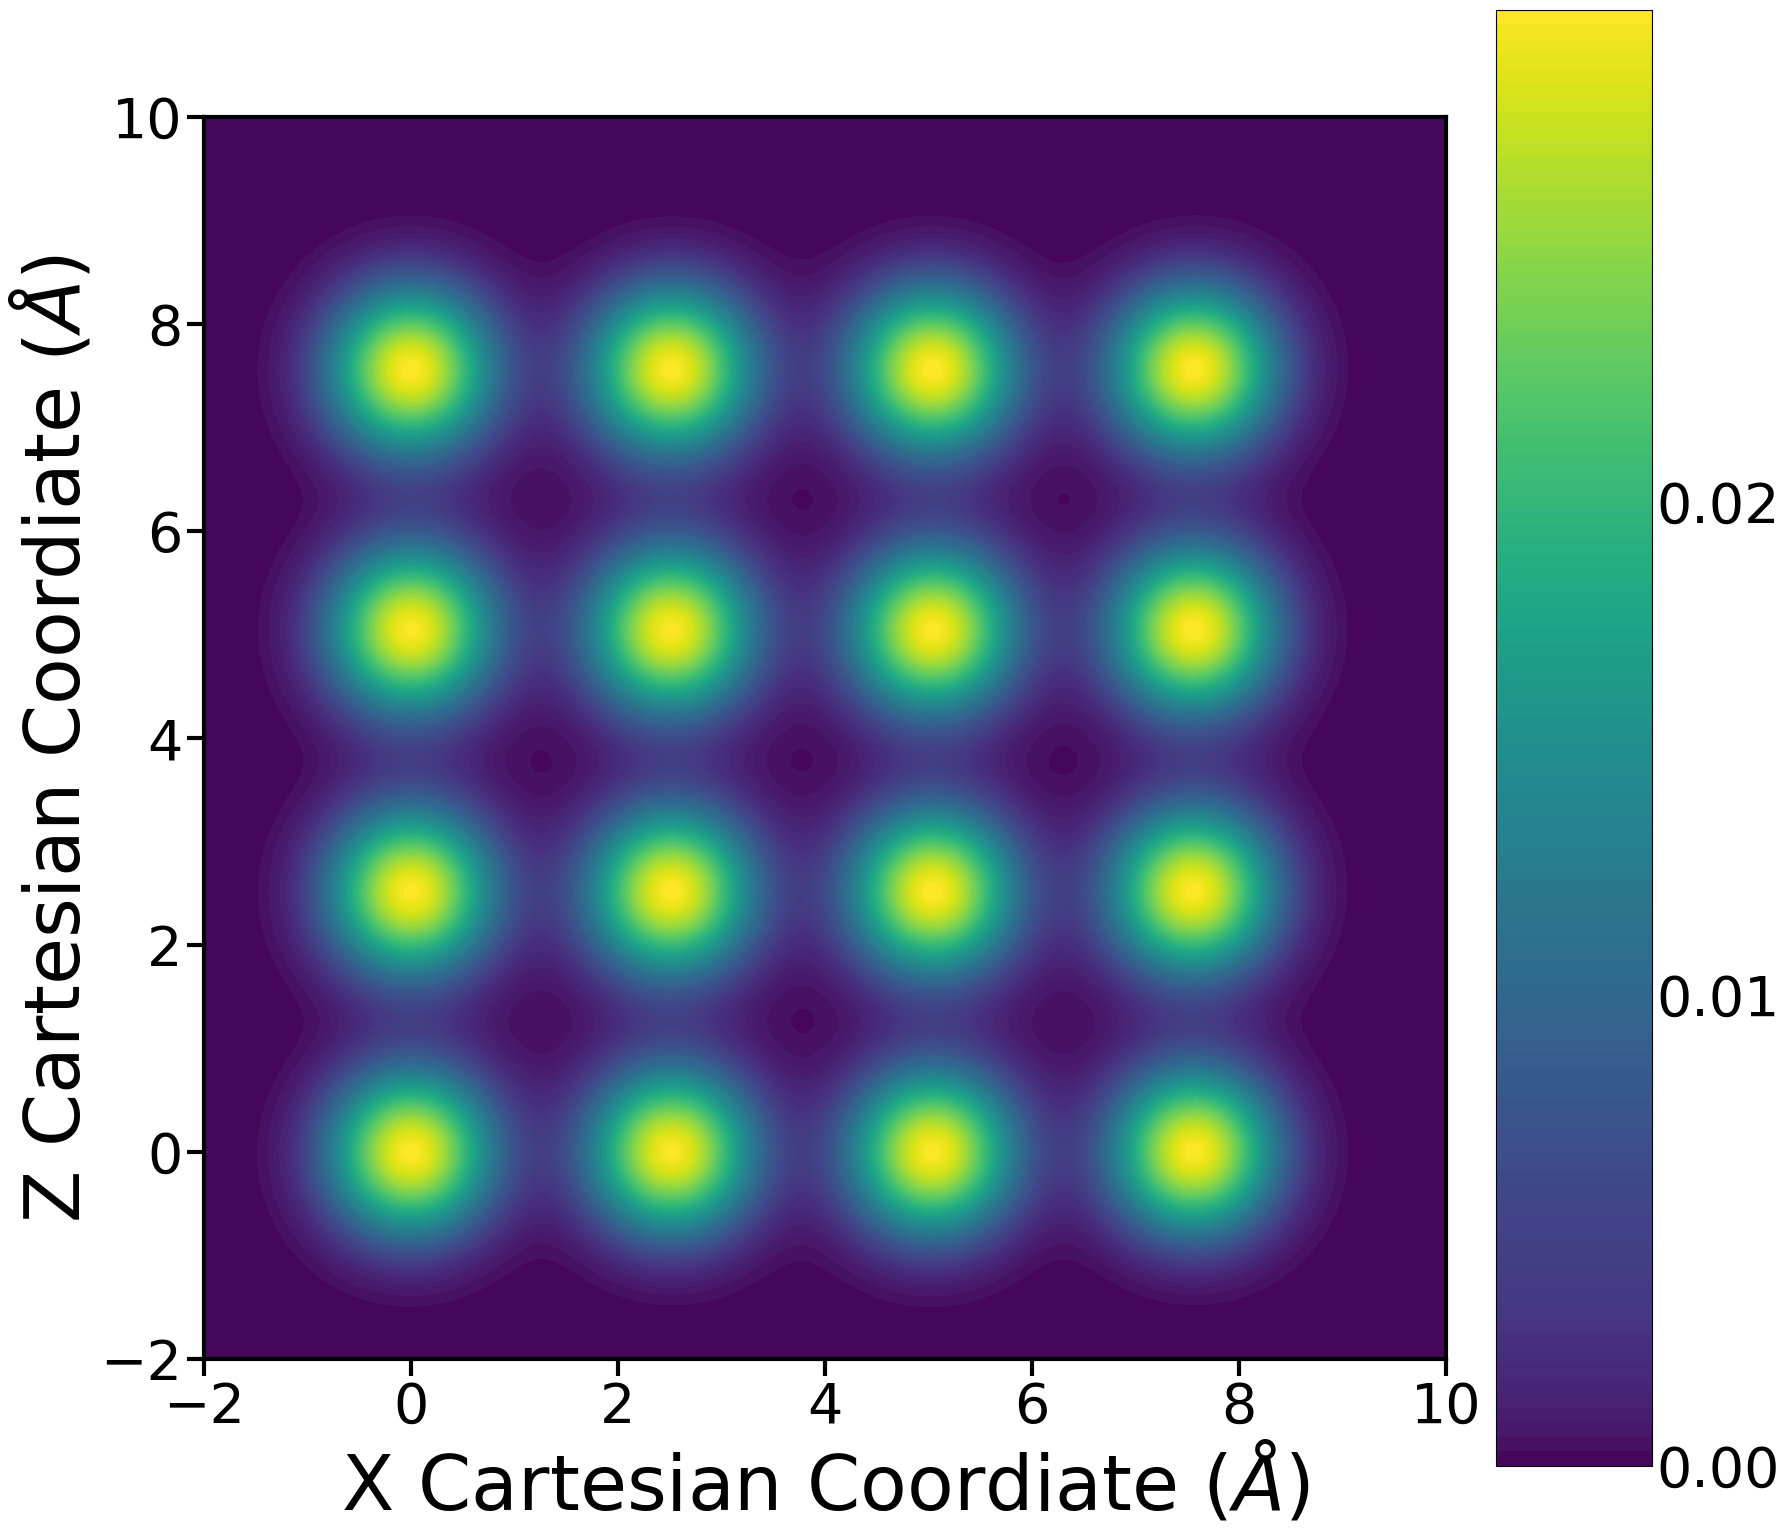

In [9]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiXZ = sns.kdeplot(
    x=df['X'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiXZ.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiXZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('Ti_Sn_XZ.png', format='png', dpi=600)

### Ti & Sn - YZ

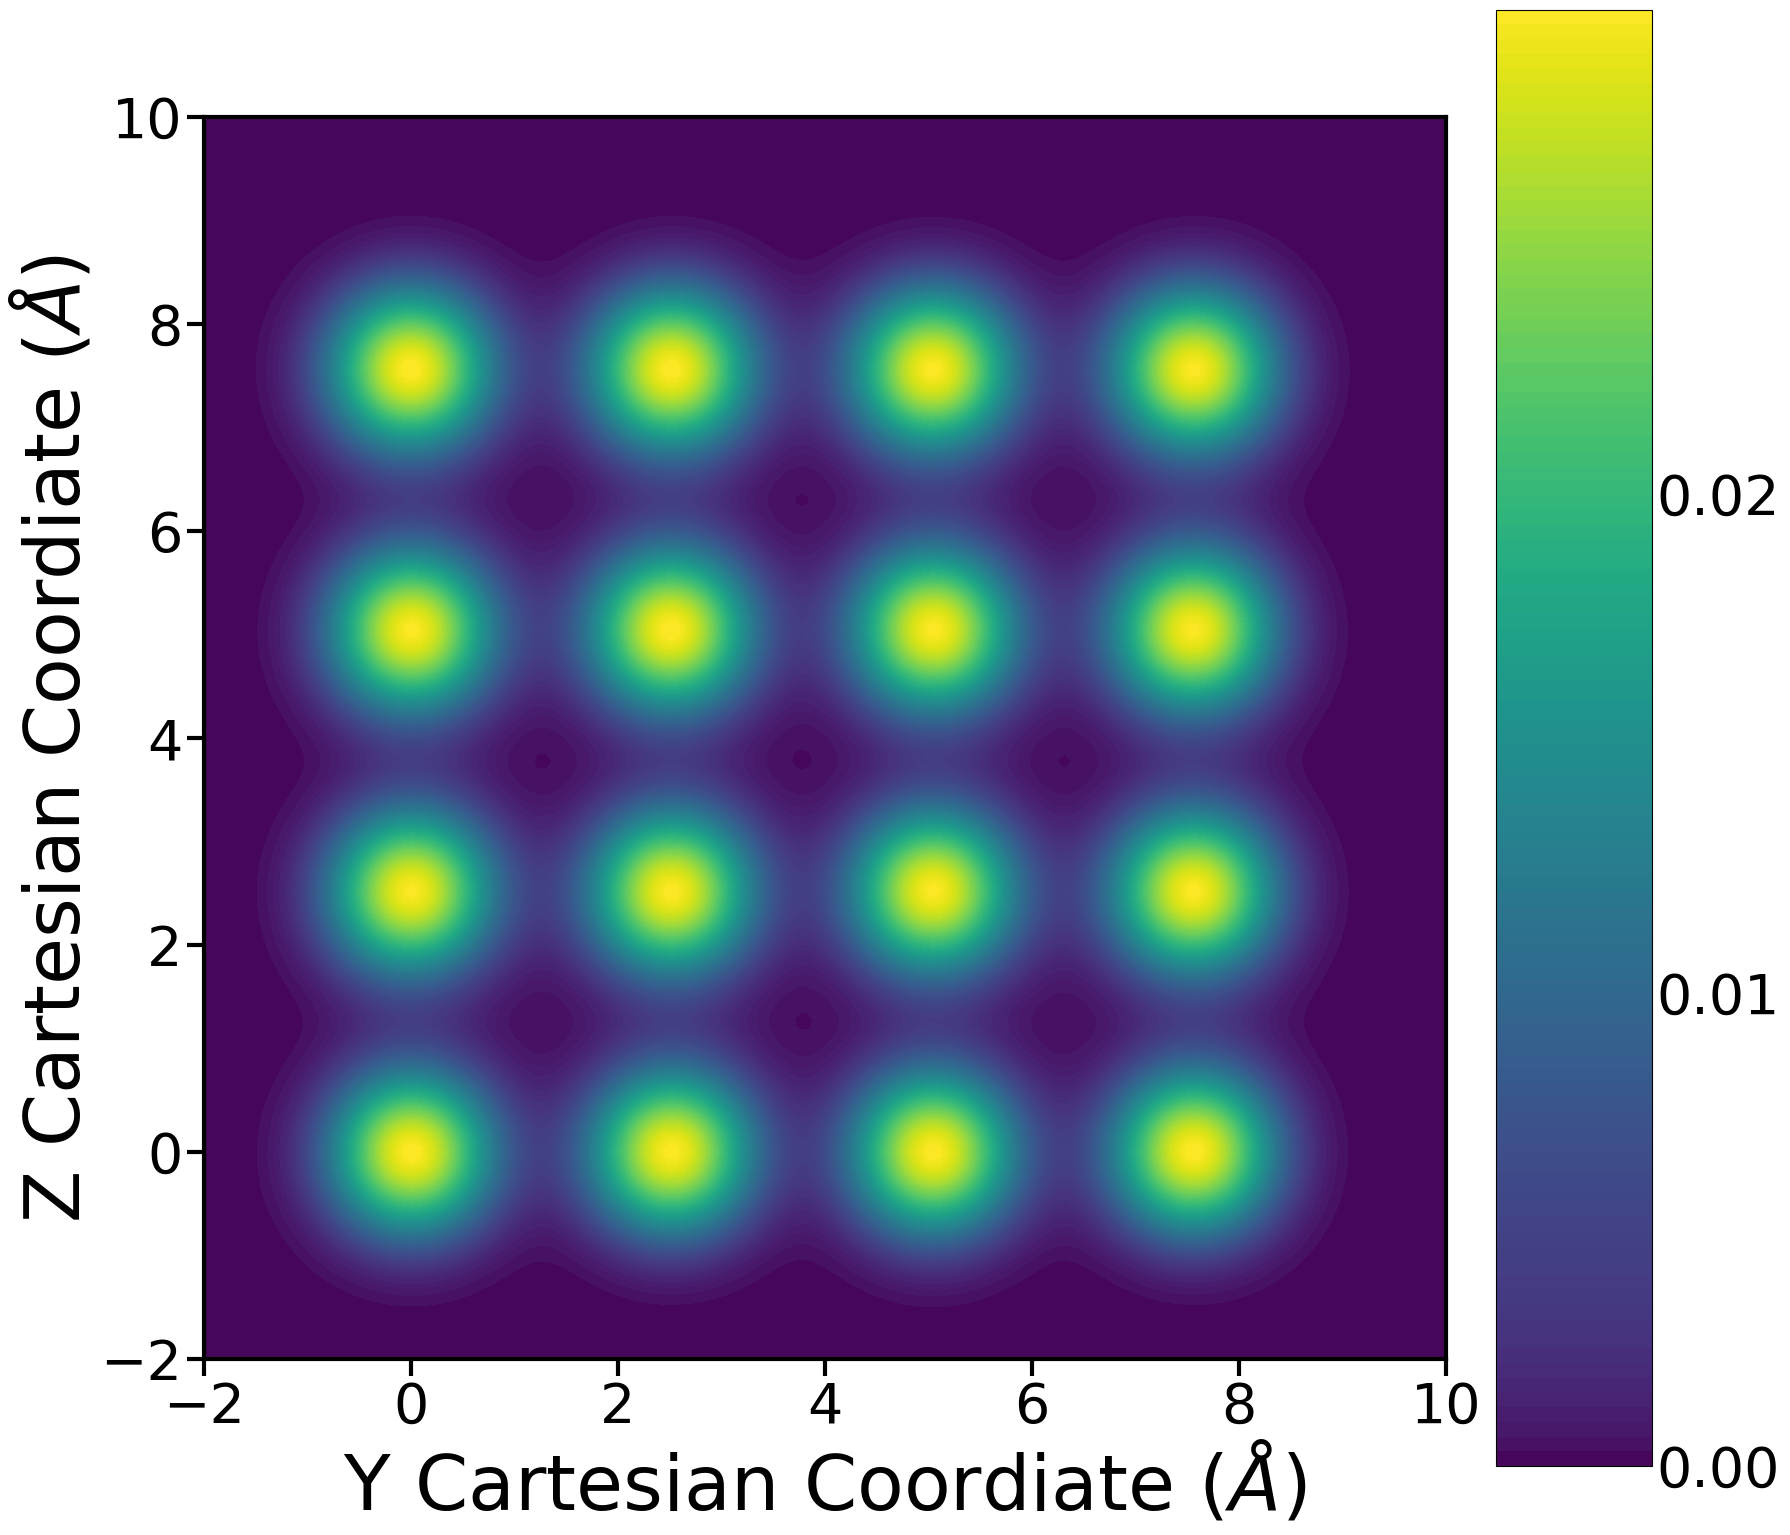

In [10]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiYZ = sns.kdeplot(
    x=df['Y'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiYZ.set_xlabel(xlabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiYZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('Ti_Sn_YZ.png', format='png', dpi=600)

# Bash part - triplets

In [11]:
echo -e "300\n0\n1\n${stem_name}_all.rmc6f\n0. 0. 3. 0. 3. 0.\n0. 0. 1. 0. 1. 0.\nytso_0_triplets_all.ave\nytso_0_triplets_all.hist" > triplets_all.in

triplets_new_bonds_sinth < triplets_all.in

 No. of theta pts                           >  No. of neighbours for bond ang (0 for all) >  Number of configurations                   >  Input file     (_counter will be added starting from 1 for no. of configs > 1)        >   Maximum r values (  6     values expected) > 
           1           1           1           2           1           3           2           2           2           3           3           3
 Minimum r values (  6     values expected) > 
 Enter file for average data                > 
 Enter file for angles histogram data       > 
File ytso_0p2_all.rmc6f processed.
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


# Python part - triplets

In [13]:
# Grab the data

file_in = open("ytso_0_triplets_all.hist", "r")
for _ in range(6):
    line = file_in.readline()
while line:
    line = file_in.readline()
    if line:
        if "b323" in line:
            for _ in range(3):
                line = file_in.readline()
            b323_angle = []
            b323_norm = []
            for _ in range(300):
                line = file_in.readline()
                b323_angle.append(float(line.split()[0]))
                b323_norm.append(float(line.split()[2]))
        if "b313" in line:
            for _ in range(3):
                line = file_in.readline()
            b313_angle = []
            b313_norm = []
            for _ in range(300):
                line = file_in.readline()
                b313_angle.append(float(line.split()[0]))
                b313_norm.append(float(line.split()[2]))
        if "b232" in line:
            for _ in range(3):
                line = file_in.readline()
            b232_angle = []
            b232_norm = []
            for _ in range(300):
                line = file_in.readline()
                b232_angle.append(float(line.split()[0]))
                b232_norm.append(float(line.split()[2]))
        if "b231" in line:
            for _ in range(3):
                line = file_in.readline()
            b231_angle = []
            b231_norm = []
            for _ in range(300):
                line = file_in.readline()
                b231_angle.append(float(line.split()[0]))
                b231_norm.append(float(line.split()[2]))
file_in.close()

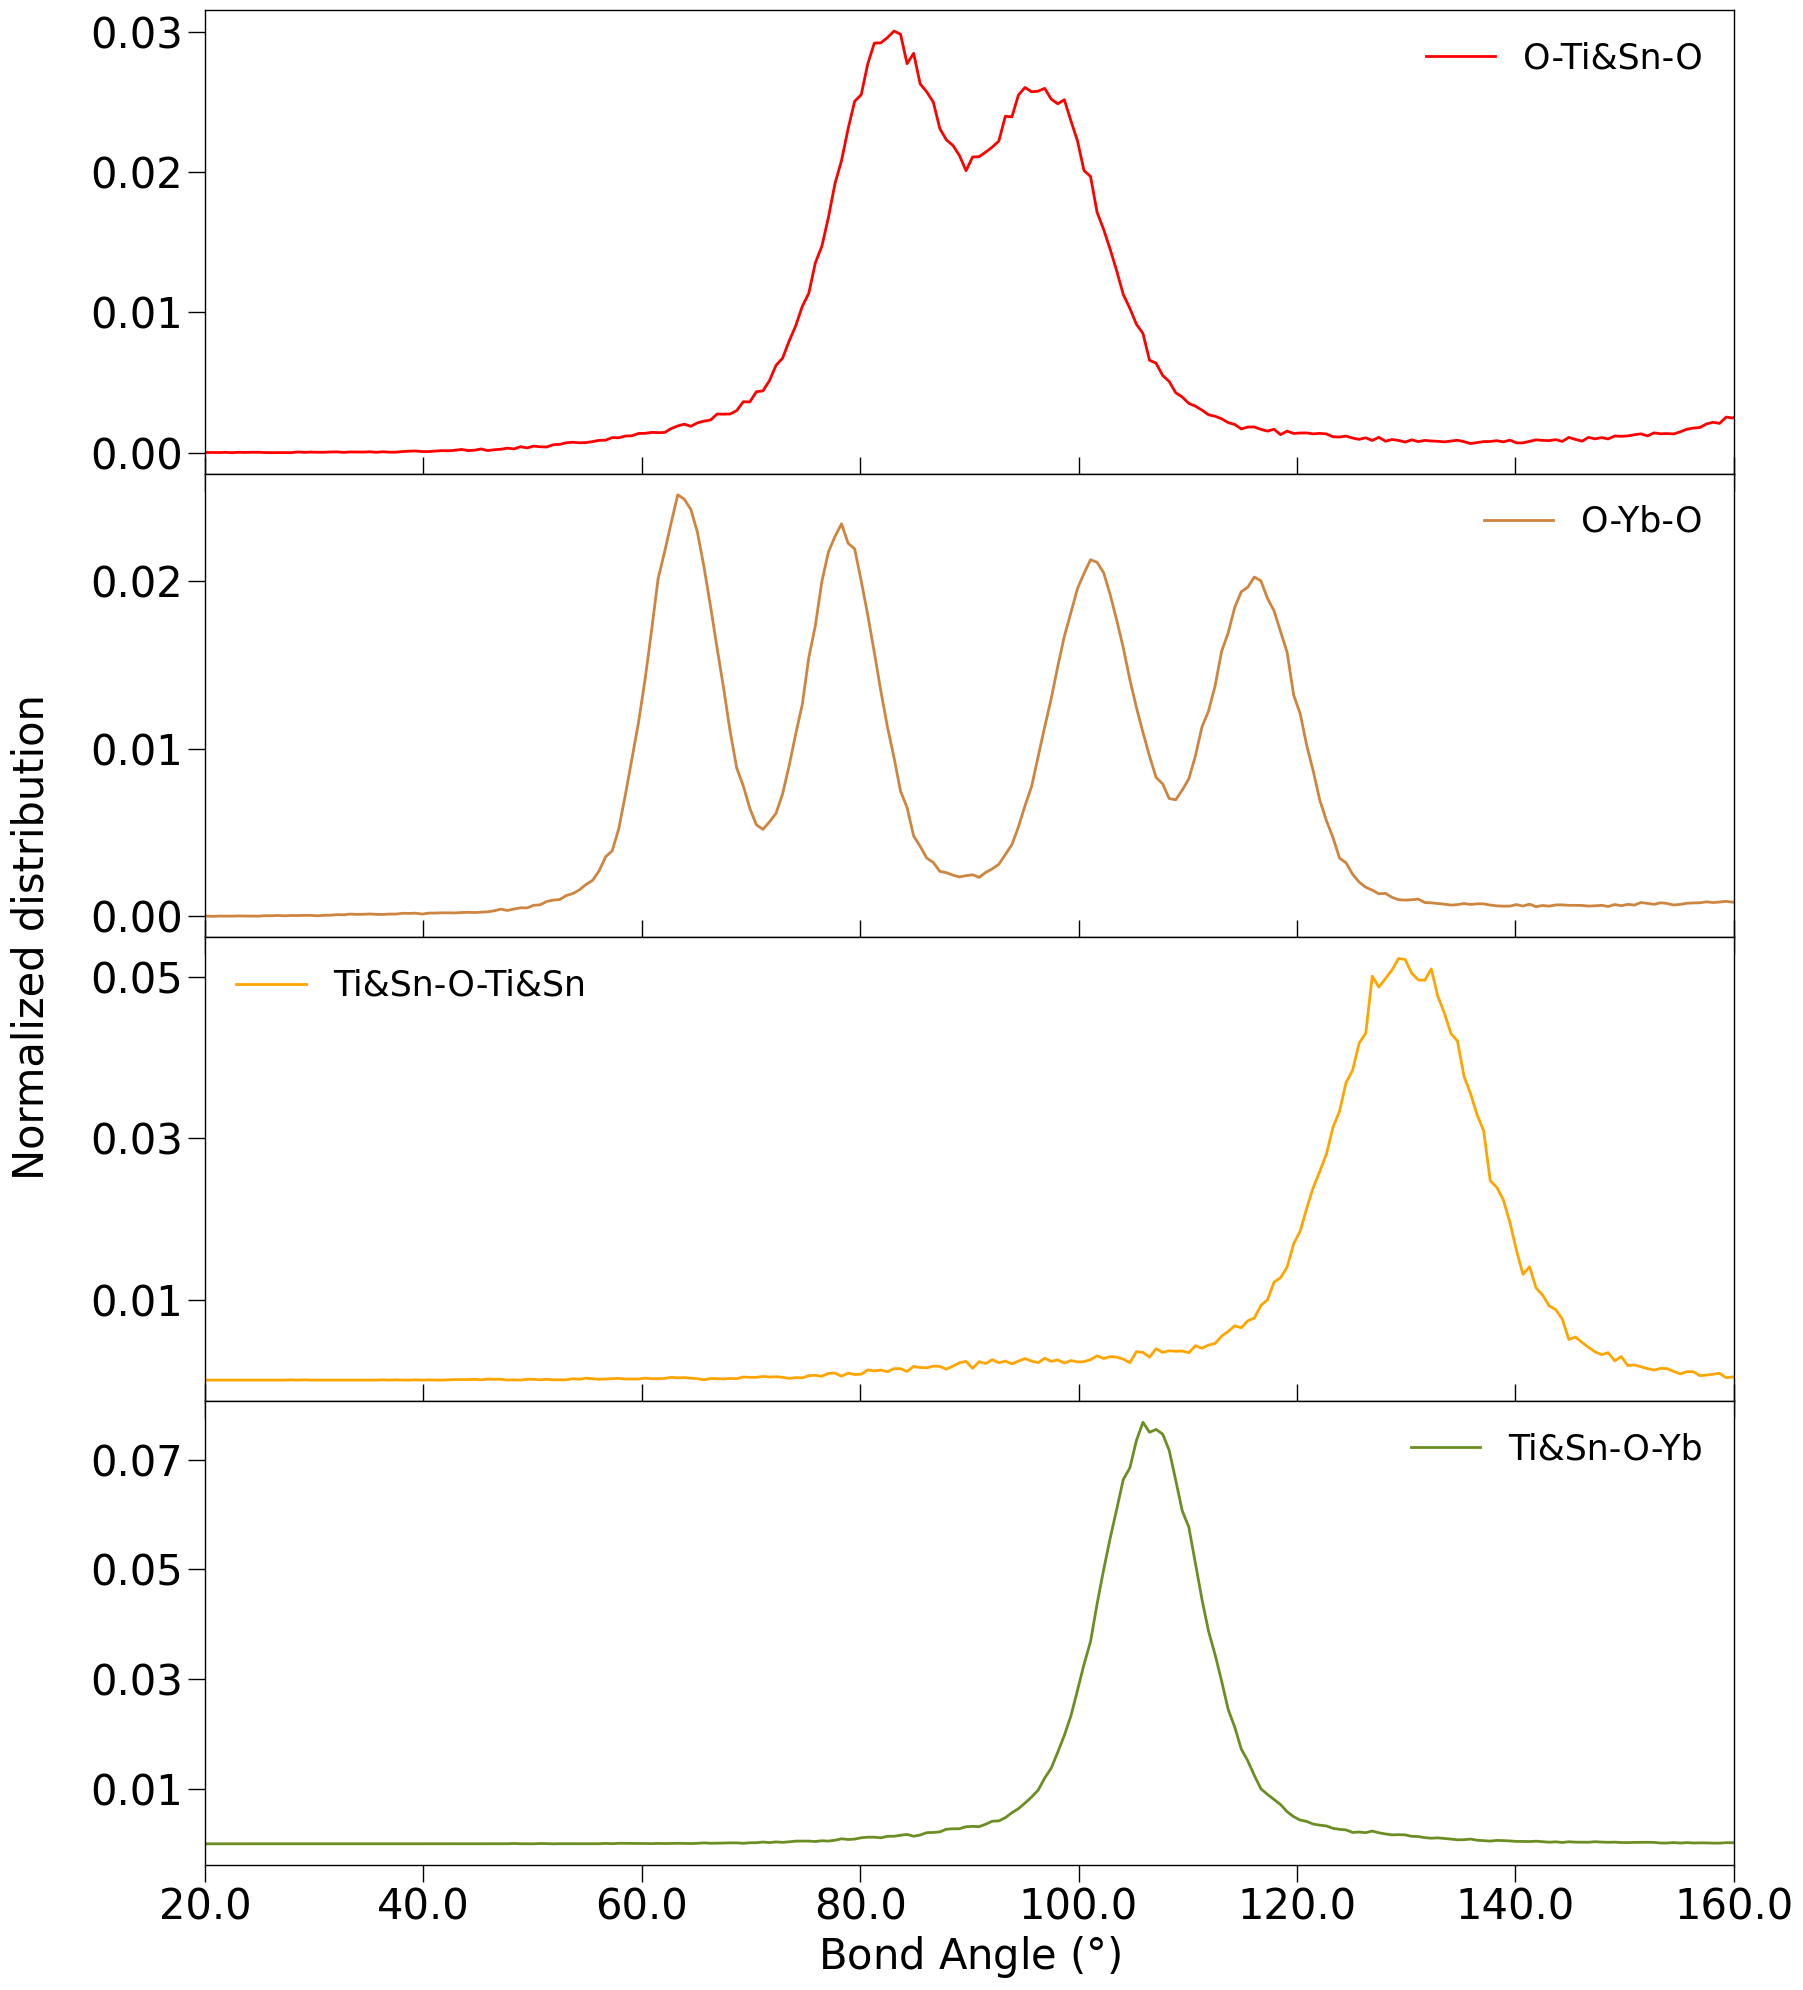

In [14]:
f = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 1, height_ratios=[1 for _ in range(4)], hspace=0)
axes = list()
for i in range(4):
    axes.append(plt.subplot(gs[i, 0]))

angle_dict = {
    0: {
        "label": "O-Ti&Sn-O",
        "color": "red",
        "data": {
            "angle": b323_angle,
            "norm": b323_norm
        }
    },
    1: {
        "label": "O-Yb-O",
        "color": "peru",
        "data": {
            "angle": b313_angle,
            "norm": b313_norm
        }
    },
    2: {
        "label": "Ti&Sn-O-Ti&Sn",
        "color": "orange",
        "data": {
            "angle": b232_angle,
            "norm": b232_norm
        }
    },
    3: {
        "label": "Ti&Sn-O-Yb",
        "color": "olivedrab",
        "data": {
            "angle": b231_angle,
            "norm": b231_norm
        }
    }
}

for i in range(4):
    axes[i].plot(angle_dict[i]["data"]["angle"], angle_dict[i]["data"]["norm"],
                 '-', color=angle_dict[i]["color"],
                 label=angle_dict[i]["label"], linewidth=2)

    axes[i].set_xlim([20, 160])
    axes[i].tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
    if i != 3:
        axes[i].set_xticklabels([])
    if i > 0:
        axes[i].xaxis.set_ticks_position('both')
    axes[i].tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
    axes[i].spines['left'].set_linewidth(1)
    axes[i].spines['right'].set_linewidth(1)
    axes[i].spines['top'].set_linewidth(1)
    axes[i].spines['bottom'].set_linewidth(1)
    if i == 3:
        axes[i].set_xlabel(r"Bond Angle ($\degree$)", fontdict={'size': 30})
    # axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
    axes[i].legend(fontsize=25, frameon=False)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if i == 3:
        axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
_ = axes[3].set_yticks([0.01, 0.03, 0.05, 0.07])
_ = axes[2].set_yticks([0.01, 0.03, 0.05])
_ = axes[1].set_yticks([0.0, 0.01, 0.02])
axes[1].set_ylabel(r"Normalized distribution", fontdict={'size': 30})
axes[1].yaxis.set_label_coords(-0.10, 0.)
plt.tight_layout()
_ = f.savefig('triplets_Ti_Sn.png', format='png', dpi=600)